In [1]:
import os

import pandas as pd 
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt

os.environ['HDF5_USE_FILE_LOCKING']='FALSE'

In [50]:
GRACE_path = "/home/kmk58/GRACE/"
GRACE_folders = os.listdir("/home/kmk58/GRACE/")
#print(GRACE_folders)

GRACE_paths_all = [GRACE_path + f for f in GRACE_folders]
#print(GRACE_paths_all)
file_GRACE=[]
for folder in GRACE_paths_all:
    for filename in os.listdir(folder):
        if filename.endswith(".nc"):
            file_GRACE.append(folder+'/'+str(filename))
           # print(file_GRACE)
        
            # df1_subset = df1.sel(lat=slice(30,40), lon=slice(270,280))
            # mean_lwe = df1_subset['lwe_thickness'].values.mean()*100 #IN CENTIMETERS
            # date = df1_subset['time'].values[0]
            # print(dict_grace)
list_grace=[]
data=pd.DataFrame()

for filename in file_GRACE:
    df1 = xr.open_dataset(filename)
    df1_subset = df1.sel(lat=slice(30,40), lon=slice(270,280))
    mean_lwe = df1_subset['lwe_thickness'].values.mean()*100 #IN CENTIMETERS
    date = pd.to_datetime(df1_subset['time'].values[0])
    if "CSR" in filename: 
        center="CSR"
    elif "JPL" in filename: 
        center="JPL"
    else: 
        center="GFZ"
    list_df = [date,center,mean_lwe]
    list_grace.append(list_df)
    
df_grace = pd.DataFrame(list_grace, columns=['Date', "Center", "Mean"]).sort_values('Date')










In [51]:
df_grace

,Date,Center,Mean
600,2002-04-17 12:00:00,JPL,7.108114
162,2002-04-18 00:00:00,CSR,5.373702
381,2002-04-18 00:00:00,GFZ,8.166167
380,2002-05-10 00:00:00,GFZ,6.155036
161,2002-05-10 12:00:00,CSR,4.830979
...,...,...,...
602,2023-02-15 00:00:00,JPL,6.973749
164,2023-02-15 00:00:00,CSR,7.859848
163,2023-03-16 12:00:00,CSR,8.247184
382,2023-03-16 12:00:00,GFZ,6.862065


Center
CSR    Axes(0.125,0.2;0.775x0.68)
GFZ    Axes(0.125,0.2;0.775x0.68)
JPL    Axes(0.125,0.2;0.775x0.68)
Name: Mean, dtype: object

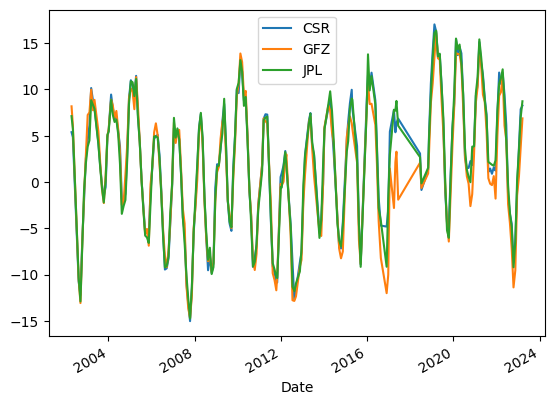

In [56]:
df_grace.set_index('Date', inplace=True)
df_grace.groupby('Center')['Mean'].plot(legend=True)


#plt.plot(df_grace['Date'], df_grace['Mean'])
#plt.xticks(x, [str(i) for i in y], rotation=90)
#plt.tick_params(axis='x', which='major', labelsize=3)
#plt.locator_params(axis='x', nbins=10) 
#plt.title("Terrestial Water Storage Deviations in Mississipi Region")
#plt.axhline(y=0, color='r', linestyle='--')
#plt.ylabel("Land Water Equivalent (m)")
#plt.show()
#df = pd.DataFrame.from_dict(dict_grace, orient='index')
#df